In [1]:
#(a)
def sum_unit(inputs, weights, bias):
    #sum of inputs * their weights, + bias
    total = 0
    for i in range(len(inputs)):
        total += inputs[i] * weights[i]
    return total + bias

#(b)
def step(val): #step func
    return 1 if val > 0 else 0

def bipolar_step(val): #bipolar step func
    return 1 if val > 0 else -1

def sigmoid(val): #sigmoid func
    return 1 / (1 + (2.71828 ** -val))

def tanh(val): #tanh funct
    return (2 / (1 + (2.71828 ** (-2 * val)))) - 1

def relu(val):  #relu func
    return max(0, val)

def leaky_relu(val):  #leaky relu func
    return val if val > 0 else 0.01 * val

#(c)
def error_comparator(predicted, actual):
    return actual - predicted

Convergence achieved after 130 epochs.


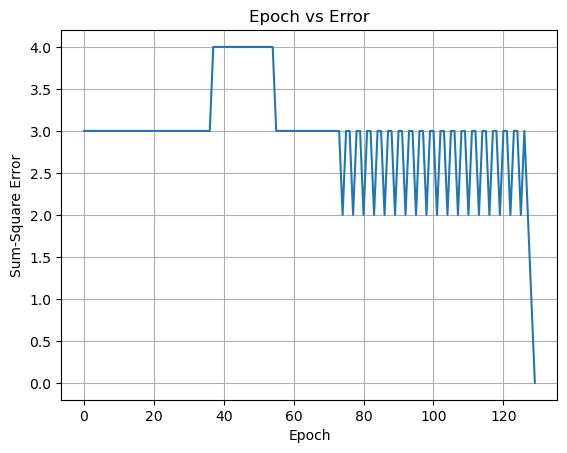

Predictions: [0 0 0 1]
Actual labels: [0 0 0 1]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.array([10, 0.2, -0.75])  # Initial weights W0, W1, W2
        self.error_history = []
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = np.insert(X[i], 0, 1)  # Add bias term
                prediction = step_activation(np.dot(xi, self.weights))
                error = y[i] - prediction
                total_error += error ** 2
                # Update weights
                self.weights += self.learning_rate * error * xi
            # Calculate and store sum-square-error
            self.error_history.append(total_error)
            if total_error <= 0.002:
                print(f'Convergence achieved after {epoch + 1} epochs.')
                break
        else:
            print('Convergence not achieved within the maximum number of epochs.')

    def predict(self, X):
        X_bias = np.insert(X, 0, 1, axis=1)  # Add bias term to each sample
        return step_activation(np.dot(X_bias, self.weights))

# Define AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # Output of AND gate

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.05, epochs=1000)
perceptron.fit(X, y)

# Plot the error history
plt.plot(perceptron.error_history)
plt.xlabel('Epoch')
plt.ylabel('Sum-Square Error')
plt.title('Epoch vs Error')
plt.grid(True)
plt.show()

# Make predictions on the training data
predictions = perceptron.predict(X)
print('Predictions:', predictions)
print('Actual labels:', y)

Convergence not achieved within the maximum number of epochs using bipolar_step.
Convergence not achieved within the maximum number of epochs using sigmoid.
Convergence achieved after 390 epochs using relu.


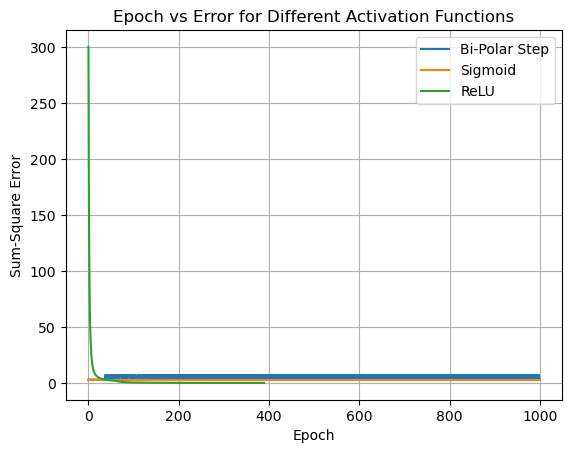

Convergence not achieved within the maximum number of epochs using bipolar_step.
Predictions using Bi-Polar Step: [-1 -1  1  1]
Actual labels: [0 0 0 1]

Convergence not achieved within the maximum number of epochs using sigmoid.
Predictions using Sigmoid: [0.99995419 0.99990256 0.99996243 0.99992007]
Actual labels: [0 0 0 1]

Convergence achieved after 390 epochs using relu.
Predictions using ReLU: [0.         0.02206614 0.02341529 0.97322614]
Actual labels: [0 0 0 1]



In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def bipolar_step(x):
    return np.where(x >= 0, 1, -1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Define the derivative of sigmoid function for learning
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Perceptron class with different activation functions
class Perceptron:
    def __init__(self, activation_func, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation_func = activation_func
        self.weights = np.array([10, 0.2, -0.75])  # Initial weights W0, W1, W2
        self.error_history = []
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = np.insert(X[i], 0, 1)  # Add bias term
                net_input = np.dot(xi, self.weights)
                prediction = self.activation_func(net_input)
                
                if self.activation_func == sigmoid:
                    prediction = sigmoid(net_input)  # Use sigmoid activation
                
                error = y[i] - prediction
                total_error += error ** 2
                
                # Update weights based on activation function
                if self.activation_func == sigmoid:
                    gradient = sigmoid_derivative(net_input)
                else:
                    gradient = 1  # For step functions, gradient is not used
                    
                self.weights += self.learning_rate * error * gradient * xi

            self.error_history.append(total_error)
            if total_error <= 0.002:
                print(f'Convergence achieved after {epoch + 1} epochs using {self.activation_func.__name__}.')
                break
        else:
            print(f'Convergence not achieved within the maximum number of epochs using {self.activation_func.__name__}.')

    def predict(self, X):
        X_bias = np.insert(X, 0, 1, axis=1)  # Add bias term to each sample
        net_input = np.dot(X_bias, self.weights)
        return self.activation_func(net_input)

# Define AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # Output of AND gate

# List of activation functions to compare
activation_functions = [bipolar_step, sigmoid, relu]
activation_names = ['Bi-Polar Step', 'Sigmoid', 'ReLU']

# Training and comparing each activation function
for activation_func, name in zip(activation_functions, activation_names):
    perceptron = Perceptron(activation_func=activation_func, learning_rate=0.05, epochs=1000)
    perceptron.fit(X, y)
    
    # Plot the error history
    plt.plot(perceptron.error_history, label=name)

plt.xlabel('Epoch')
plt.ylabel('Sum-Square Error')
plt.title('Epoch vs Error for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

# Predictions using the final model with each activation function
for activation_func, name in zip(activation_functions, activation_names):
    perceptron = Perceptron(activation_func=activation_func, learning_rate=0.05, epochs=1000)
    perceptron.fit(X, y)
    predictions = perceptron.predict(X)
    print(f'Predictions using {name}:', predictions)
    print(f'Actual labels: {y}\n')

Learning rate: 0.1, Converged in 68 epochs
Learning rate: 0.2, Converged in 37 epochs
Learning rate: 0.3, Converged in 23 epochs
Learning rate: 0.4, Converged in 23 epochs
Learning rate: 0.5, Converged in 19 epochs
Learning rate: 0.6, Converged in 19 epochs
Learning rate: 0.7, Converged in 15 epochs
Learning rate: 0.8, Converged in 14 epochs
Learning rate: 0.9, Converged in 13 epochs
Learning rate: 1, Converged in 12 epochs


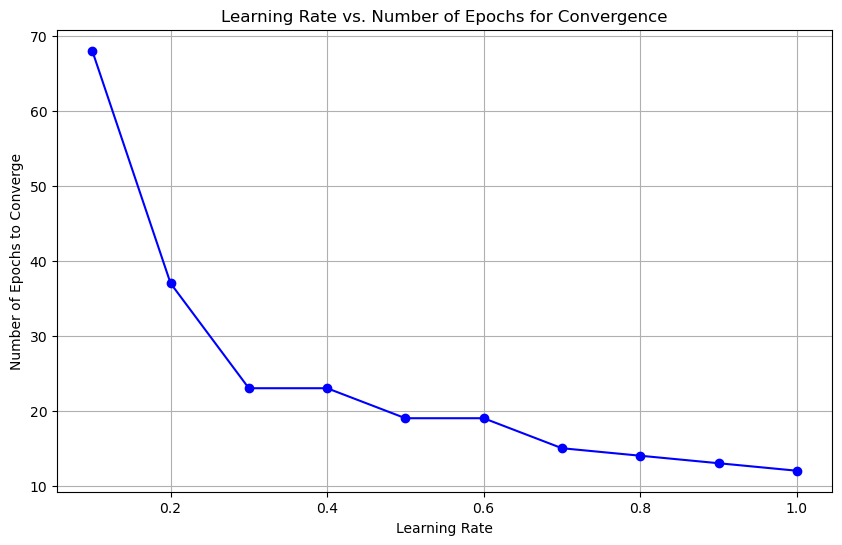

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.array([10, 0.2, -0.75])  # Initial weights W0, W1, W2
        self.error_history = []
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = np.insert(X[i], 0, 1)  # Add bias term
                net_input = np.dot(xi, self.weights)
                prediction = step_activation(net_input)
                
                error = y[i] - prediction
                total_error += error ** 2
                
                # Update weights
                self.weights += self.learning_rate * error * xi

            self.error_history.append(total_error)
            if total_error <= 0.002:
                return epoch + 1
        return self.epochs

# Define AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # Output of AND gate

# Define learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs_to_converge = []

# Train perceptron with different learning rates
for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, epochs=1000)
    epochs = perceptron.fit(X, y)
    epochs_to_converge.append(epochs)
    print(f'Learning rate: {lr}, Converged in {epochs} epochs')

# Plot the number of epochs to converge against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_to_converge, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs to Converge')
plt.title('Learning Rate vs. Number of Epochs for Convergence')
plt.grid(True)
plt.show()

Learning rate: 0.1, Converged in 1000 epochs
Learning rate: 0.2, Converged in 1000 epochs
Learning rate: 0.3, Converged in 1000 epochs
Learning rate: 0.4, Converged in 1000 epochs
Learning rate: 0.5, Converged in 1000 epochs
Learning rate: 0.6, Converged in 1000 epochs
Learning rate: 0.7, Converged in 1000 epochs
Learning rate: 0.8, Converged in 1000 epochs
Learning rate: 0.9, Converged in 1000 epochs
Learning rate: 1, Converged in 1000 epochs


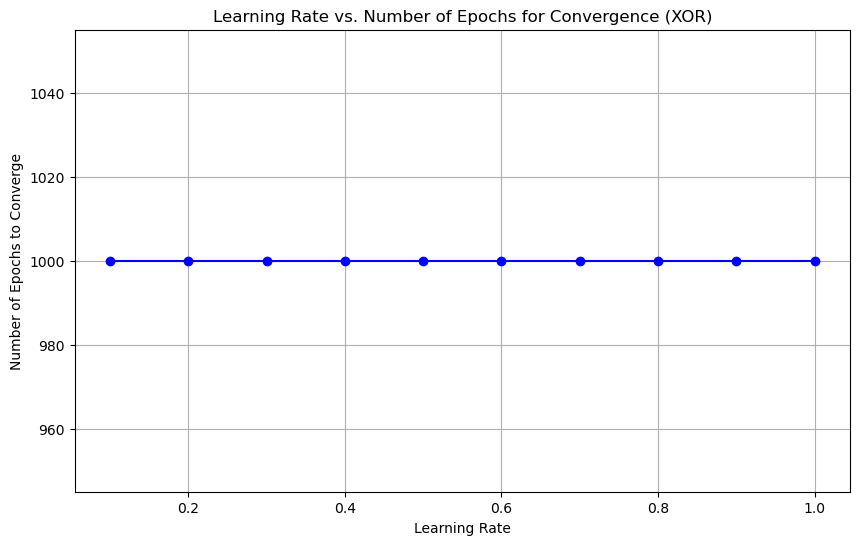

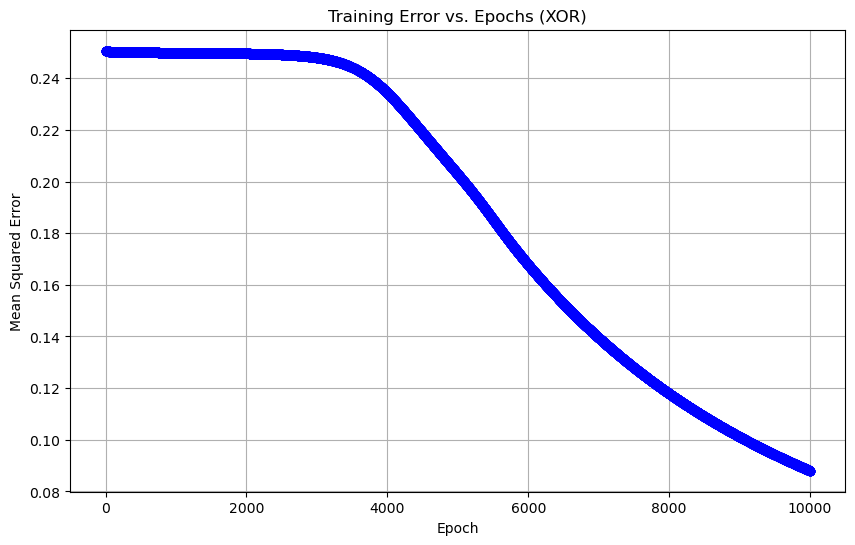

Activation function: bipolar_step, Converged in 10000 epochs


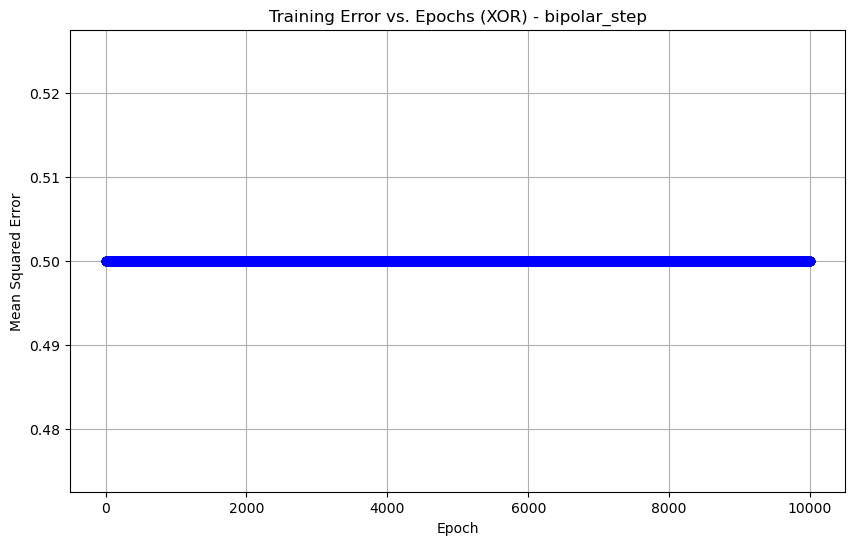

Activation function: sigmoid, Converged in 10000 epochs


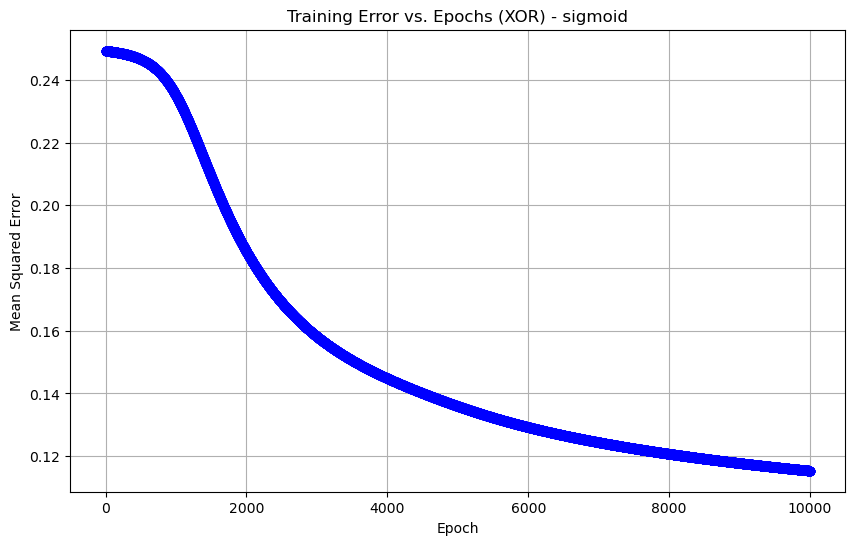

Activation function: relu, Converged in 10000 epochs


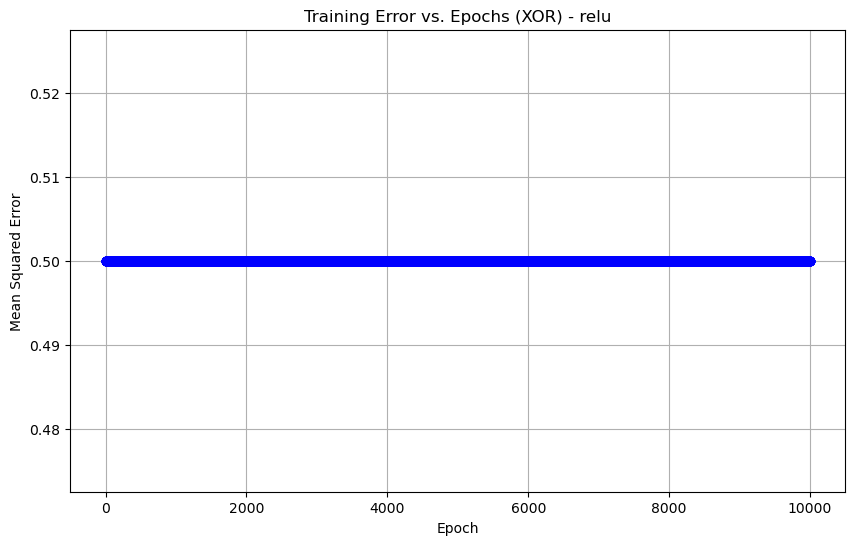

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.array([10, 0.2, -0.75])  # Initial weights W0, W1, W2
        self.error_history = []
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = np.insert(X[i], 0, 1)  # Add bias term
                net_input = np.dot(xi, self.weights)
                prediction = step_activation(net_input)
                
                error = y[i] - prediction
                total_error += error ** 2
                
                # Update weights
                self.weights += self.learning_rate * error * xi

            self.error_history.append(total_error)
            if total_error <= 0.002:
                return epoch + 1
        return self.epochs

# Define XOR gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # Output of XOR gate

# Define learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs_to_converge = []

# Train perceptron with different learning rates
for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, epochs=1000)
    epochs = perceptron.fit(X, y)
    epochs_to_converge.append(epochs)
    print(f'Learning rate: {lr}, Converged in {epochs} epochs')

# Plot the number of epochs to converge against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_to_converge, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs to Converge')
plt.title('Learning Rate vs. Number of Epochs for Convergence (XOR)')
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Multi-Layer Perceptron class
class MLP:
    def __init__(self, learning_rate=0.1, epochs=10000, hidden_nodes=2):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_nodes = hidden_nodes
        self.error_history = []

    def fit(self, X, y):
        # Initialize weights
        self.input_layer_weights = np.random.uniform(-1, 1, (X.shape[1], self.hidden_nodes))
        self.hidden_layer_weights = np.random.uniform(-1, 1, (self.hidden_nodes, 1))
        self.bias = np.ones((1, X.shape[0]))

        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.input_layer_weights)
            hidden_layer_output = sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.hidden_layer_weights)
            output = sigmoid(output_layer_input)

            # Calculate error
            error = y - output
            total_error = np.mean(error**2)
            self.error_history.append(total_error)

            # Backward pass
            output_error = error * sigmoid_derivative(output_layer_input)
            hidden_error = np.dot(output_error, self.hidden_layer_weights.T) * sigmoid_derivative(hidden_layer_input)

            # Update weights
            self.hidden_layer_weights += self.learning_rate * np.dot(hidden_layer_output.T, output_error)
            self.input_layer_weights += self.learning_rate * np.dot(X.T, hidden_error)

            if total_error <= 0.002:
                return epoch + 1

        return self.epochs

# Define XOR gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # Output of XOR gate (must be 2D for MLP)

# Initialize and train MLP
mlp = MLP(learning_rate=0.1, epochs=10000, hidden_nodes=2)
epochs = mlp.fit(X, y)

# Plot error history
plt.figure(figsize=(10, 6))
plt.plot(mlp.error_history, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Error vs. Epochs (XOR)')
plt.grid(True)
plt.show()


# Define activation functions and their derivatives
def bipolar_step(x):
    return np.where(x >= 0, 1, -1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Multi-Layer Perceptron class with different activation functions
class MLP:
    def __init__(self, activation_fn='sigmoid', learning_rate=0.1, epochs=10000, hidden_nodes=2):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_nodes = hidden_nodes
        self.activation_fn = activation_fn
        self.error_history = []

    def activation(self, x):
        if self.activation_fn == 'bipolar_step':
            return bipolar_step(x)
        elif self.activation_fn == 'sigmoid':
            return sigmoid(x)
        elif self.activation_fn == 'relu':
            return relu(x)
    
    def activation_derivative(self, x):
        if self.activation_fn == 'bipolar_step':
            return np.where(x >= 0, 0, 0)  # Derivative is zero, no learning
        elif self.activation_fn == 'sigmoid':
            return sigmoid_derivative(x)
        elif self.activation_fn == 'relu':
            return relu_derivative(x)

    def fit(self, X, y):
        # Initialize weights
        self.input_layer_weights = np.random.uniform(-1, 1, (X.shape[1], self.hidden_nodes))
        self.hidden_layer_weights = np.random.uniform(-1, 1, (self.hidden_nodes, 1))

        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.input_layer_weights)
            hidden_layer_output = self.activation(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.hidden_layer_weights)
            output = self.activation(output_layer_input)

            # Calculate error
            error = y - output
            total_error = np.mean(error**2)
            self.error_history.append(total_error)

            # Backward pass
            output_error = error * self.activation_derivative(output_layer_input)
            hidden_error = np.dot(output_error, self.hidden_layer_weights.T) * self.activation_derivative(hidden_layer_input)

            # Update weights
            self.hidden_layer_weights += self.learning_rate * np.dot(hidden_layer_output.T, output_error)
            self.input_layer_weights += self.learning_rate * np.dot(X.T, hidden_error)

            if total_error <= 0.002:
                return epoch + 1

        return self.epochs

# Test different activation functions
activation_functions = ['bipolar_step', 'sigmoid', 'relu']
for func in activation_functions:
    mlp = MLP(activation_fn=func, learning_rate=0.1, epochs=10000, hidden_nodes=2)
    epochs = mlp.fit(X, y)
    print(f'Activation function: {func}, Converged in {epochs} epochs')
    
    # Plot error history
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.error_history, marker='o', linestyle='-', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training Error vs. Epochs (XOR) - {func}')
    plt.grid(True)
    plt.show()

Accuracy: 100.00%


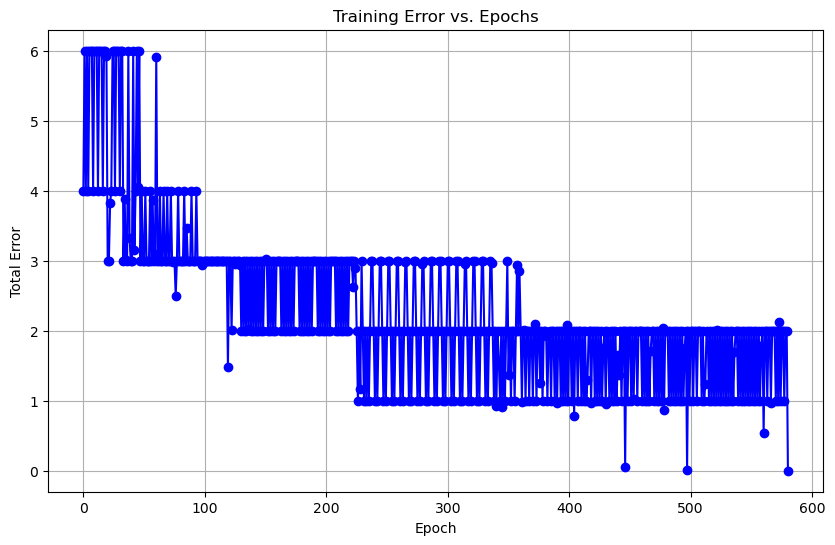

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define sigmoid derivative function
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.error_history = []
    
    def fit(self, X, y):
        # Initialize weights
        self.weights = np.random.uniform(-1, 1, X.shape[1])
        
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = X[i]
                yi = y[i]
                
                # Calculate net input
                net_input = np.dot(xi, self.weights) + self.bias
                prediction = sigmoid(net_input)
                
                # Calculate error
                error = yi - prediction
                total_error += error ** 2
                
                # Update weights and bias
                self.weights += self.learning_rate * error * xi
                self.bias += self.learning_rate * error
                
            self.error_history.append(total_error)
            if total_error <= 0.002:
                break

        return self.weights, self.bias

    def predict(self, X):
        net_input = np.dot(X, self.weights) + self.bias
        return np.round(sigmoid(net_input))  # Round to get binary output

# Customer data
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

# Encode the target variable
df['High Value'] = df['High Value'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = df['High Value'].values

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
weights, bias = perceptron.fit(X, y)

# Predict
y_pred = perceptron.predict(X)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot error history
plt.figure(figsize=(10, 6))
plt.plot(perceptron.error_history, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Training Error vs. Epochs')
plt.grid(True)
plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the customer data
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

# Encode the target variable
df['High Value'] = df['High Value'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = df['High Value'].values

# Add bias term
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for bias term

# Calculate weights using pseudo-inverse
X_pseudo_inverse = np.linalg.pinv(X_bias)
weights = X_pseudo_inverse.dot(y)

# Predict using pseudo-inverse weights
def predict_pseudo_inverse(X, weights):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    predictions = sigmoid(X_bias.dot(weights))
    return np.round(predictions)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Predictions and accuracy
y_pred_pseudo_inverse = predict_pseudo_inverse(X, weights)
accuracy_pseudo_inverse = np.mean(y_pred_pseudo_inverse == y)

print(f'Accuracy using Pseudo-Inverse Method: {accuracy_pseudo_inverse * 100:.2f}%')

# Compare with Perceptron results
print(f'Accuracy using Perceptron: {accuracy * 100:.2f}%')

Accuracy using Pseudo-Inverse Method: 60.00%
Accuracy using Perceptron: 100.00%


In [15]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate training data
# Inputs are [A, B], targets are the output for AND logic gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])

# Initialize weights (random small values)
np.random.seed(42)
V = np.random.rand(2, 2)  # Weights from input to hidden layer
W = np.random.rand(2, 1)  # Weights from hidden to output layer

# Learning rate and convergence criteria
learning_rate = 0.05
convergence_threshold = 0.002
max_iterations = 1000

# Training the neural network
for iteration in range(max_iterations):
    # Forward pass
    
    # Hidden layer input
    hidden_input = np.dot(inputs, V)
    
    # Apply activation function (sigmoid) to hidden layer input
    hidden_output = sigmoid(hidden_input)
    
    # Output layer input
    final_input = np.dot(hidden_output, W)
    
    # Apply activation function (sigmoid) to output layer input
    final_output = sigmoid(final_input)
    
    # Calculate the error (mean squared error)
    error = targets - final_output
    mean_squared_error = np.mean(np.square(error))
    
    # Check for convergence
    if mean_squared_error <= convergence_threshold:
        print(f"Converged after {iteration+1} iterations with MSE: {mean_squared_error}")
        break
    
    # Backpropagation
    
    # Output layer error and delta (gradient of loss w.r.t weights)
    output_delta = error * sigmoid_derivative(final_output)
    
    # Hidden layer error and delta
    hidden_error = output_delta.dot(W.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    
    # Update weights
    W += learning_rate * hidden_output.T.dot(output_delta)
    V += learning_rate * inputs.T.dot(hidden_delta)
    
    # Print the error for every 100 iterations
    if (iteration + 1) % 100 == 0:
        print(f"Iteration {iteration+1}, MSE: {mean_squared_error}")

# Final outputs after training
print("Final weights (input to hidden layer):\n", V)
print("Final weights (hidden to output layer):\n", W)

# Testing the trained neural network on the AND gate logic
print("Predictions for AND gate inputs:")
for i, input_data in enumerate(inputs):
    hidden_input = np.dot(input_data, V)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W)
    final_output = sigmoid(final_input)
    
    print(f"Input: {input_data}, Predicted Output: {np.round(final_output, 2)}, Actual Output: {targets[i][0]}")

Iteration 100, MSE: 0.21874021126983628
Iteration 200, MSE: 0.21096011291458588
Iteration 300, MSE: 0.20887266772565524
Iteration 400, MSE: 0.20768673163615375
Iteration 500, MSE: 0.20653229235342027
Iteration 600, MSE: 0.20514839224850365
Iteration 700, MSE: 0.20338600953222952
Iteration 800, MSE: 0.20110677568590696
Iteration 900, MSE: 0.19817039766586278
Iteration 1000, MSE: 0.1944648792885632
Final weights (input to hidden layer):
 [[-0.21722932  0.64854177]
 [ 0.10298689  0.33198645]]
Final weights (hidden to output layer):
 [[-1.08180358]
 [-0.64798084]]
Predictions for AND gate inputs:
Input: [0 0], Predicted Output: [0.3], Actual Output: 0
Input: [0 1], Predicted Output: [0.28], Actual Output: 0
Input: [1 0], Predicted Output: [0.29], Actual Output: 0
Input: [1 1], Predicted Output: [0.27], Actual Output: 1


In [17]:
#(a)
def summation_unit(inputs, weights):
    return sum(i * w for i, w in zip(inputs, weights))
#(b)
import numpy as np
def step_function(x):
    return 1 if x >= 0 else 0
def bipolar_step_function(x):
    return 1 if x >= 0 else -1
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))
def tanh_function(x):
    return np.tanh(x)
def relu_function(x):
    return max(0, x)
def leaky_relu_function(x, alpha=0.01):
    return x if x > 0 else alpha * x
#(c)
def calculate_error(target, predicted):
    return 0.5 * (target - predicted) ** 2

# Comparator function for overall error
def comparator_unit_error_calculation(target_outputs, predicted_outputs):
    total_error = 0
    for target, predicted in zip(target_outputs, predicted_outputs):
        total_error += calculate_error(target, predicted)
    return total_error

# XOR Gate Inputs and Targets
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

# Random weight initialization
np.random.seed(42)
weights_input_hidden = np.random.rand(2, 2) - 0.5
weights_hidden_output = np.random.rand(2, 1) - 0.5

# Learning parameters
learning_rate = 0.05
epochs = 10000

# Training the network
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid_function(hidden_layer_input)  # Activation: Sigmoid

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid_function(output_layer_input)

    # Error calculation (MSE)
    error = targets - output_layer_output
    mse = np.mean(np.square(error))
    
    # Backpropagation
    output_delta = error * sigmoid_function(output_layer_output) * (1 - sigmoid_function(output_layer_output))
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_function(hidden_layer_output) * (1 - sigmoid_function(hidden_layer_output))
    
    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
    
    # Early stopping based on MSE threshold
    if mse < 0.001:
        break

# Test the model
for input_data in inputs:
    hidden_layer_input = np.dot(input_data, weights_input_hidden)
    hidden_layer_output = sigmoid_function(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid_function(output_layer_input)
    
    print(f"Input: {input_data}, Predicted Output: {np.round(predicted_output, 2)}")

Input: [0 0], Predicted Output: [0.5]
Input: [0 1], Predicted Output: [0.5]
Input: [1 0], Predicted Output: [0.5]
Input: [1 1], Predicted Output: [0.5]


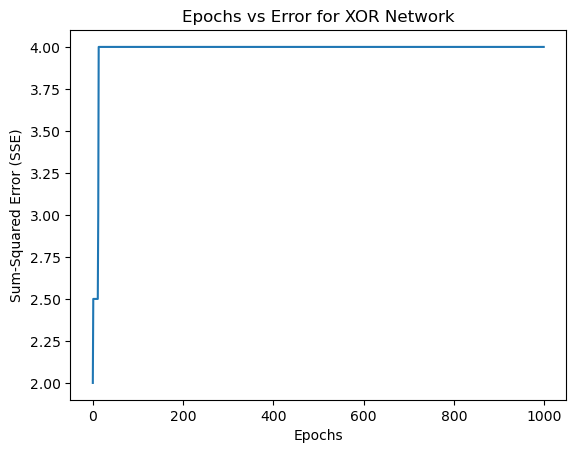

Input: [0 0], Predicted Output: [0 1]
Input: [0 1], Predicted Output: [0 1]
Input: [1 0], Predicted Output: [1 0]
Input: [1 1], Predicted Output: [1 0]


In [19]:
#(a)
def summation_unit(inputs, weights):
    return sum(i * w for i, w in zip(inputs, weights))
#(b)
def step_function(x):
    return 1 if x >= 0 else 0
#(c)
def calculate_error(target, predicted):
    return 0.5 * (target - predicted) ** 2

import numpy as np
import matplotlib.pyplot as plt

# XOR Gate Inputs and Targets
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # Mapping [O1, O2] for XOR

# Initial weights
V = np.random.uniform(-0.5, 0.5, (2, 2))  # Weights between inputs and hidden layer
W = np.random.uniform(-0.5, 0.5, (2, 2))  # Weights between hidden layer and output layer

# Learning parameters
learning_rate = 0.05
epochs = 1000
convergence_error = 0.002

# Activation function (step)
def step_function(x):
    return 1 if x >= 0 else 0

# Training the network
errors = []
for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
        # Forward pass
        # Input to hidden layer
        hidden_layer_input = np.dot(inputs[i], V)
        hidden_layer_output = np.array([step_function(h) for h in hidden_layer_input])
        
        # Hidden to output layer
        output_layer_input = np.dot(hidden_layer_output, W)
        output_layer_output = np.array([step_function(o) for o in output_layer_input])
        
        # Error calculation (SSE)
        error = targets[i] - output_layer_output
        total_error += np.sum(calculate_error(targets[i], output_layer_output))
        
        # Backpropagation - Update weights
        output_delta = error
        W += learning_rate * np.outer(hidden_layer_output, output_delta)
        
        hidden_delta = np.dot(output_delta, W.T) * hidden_layer_output * (1 - hidden_layer_output)
        V += learning_rate * np.outer(inputs[i], hidden_delta)
    
    # Append the total error for this epoch
    errors.append(total_error)
    
    # Check convergence
    if total_error <= convergence_error:
        print(f"Convergence reached after {epoch+1} epochs")
        break

# Plotting the error over epochs
plt.plot(range(len(errors)), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error (SSE)')
plt.title('Epochs vs Error for XOR Network')
plt.show()

# Testing the trained network
for input_data in inputs:
    hidden_layer_input = np.dot(input_data, V)
    hidden_layer_output = np.array([step_function(h) for h in hidden_layer_input])
    output_layer_input = np.dot(hidden_layer_output, W)
    predicted_output = np.array([step_function(o) for o in output_layer_input])
    
    print(f"Input: {input_data}, Predicted Output: {predicted_output}")